# WeatherPy
----

## Observations and Insights
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
city_df = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pd.set_option("max_columns", len(city_df.columns))
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
responses = [];
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
            
# Print the city count to confirm sufficient count
city_count = len(cities)

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "cape town"
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [5]:
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=6b9fca5bb7167ca8e527ee04dc1ced14&q=cape town'

In [6]:
response = requests.get(query_url).json()
response

{'coord': {'lon': 18.42, 'lat': -33.93},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 282.6,
  'feels_like': 281.53,
  'temp_min': 282.04,
  'temp_max': 283.15,
  'pressure': 1024,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 1, 'deg': 330},
 'clouds': {'all': 0},
 'dt': 1593804159,
 'sys': {'type': 1,
  'id': 1899,
  'country': 'ZA',
  'sunrise': 1593755522,
  'sunset': 1593791330},
 'timezone': 7200,
 'id': 3369157,
 'name': 'Cape Town',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build partial query URL
# query_url = f"{url}appid={api_key}&q="
units = "imperial"
query_url = f'{url}appid={weather_api_key}&units={units}&q='
# set up lists to hold reponse info
lat = []
lng = []
temp_max = []
humidity = []
wind = []
clouds = []
dt = []
country = []
final_city = []
# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities[:605]):
    try:
        response=requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        dt.append(response['dt'])
        country.append(response['sys']['country'])
        final_city.append(city)
        print(f"city number is {index} {city}")
    except:
        print("city not found")

city number is 0 ushuaia
city number is 1 sao felix do xingu
city number is 2 candido mendes
city not found
city number is 4 bumba
city number is 5 saint george
city number is 6 provideniya
city number is 7 siavonga
city number is 8 kaitangata
city number is 9 zheleznodorozhnyy
city number is 10 hobart
city number is 11 labuan
city number is 12 butaritari
city number is 13 hilo
city number is 14 east london
city number is 15 atuona
city number is 16 morros
city number is 17 mataura
city number is 18 asasa
city number is 19 bilibino
city number is 20 katsuura
city number is 21 new norfolk
city number is 22 mount gambier
city not found
city number is 24 triolet
city number is 25 kavieng
city number is 26 abu dhabi
city number is 27 caravelas
city number is 28 albany
city number is 29 mar del plata
city number is 30 marawi
city number is 31 bredasdorp
city not found
city number is 33 touros
city number is 34 hasaki
city number is 35 maragheh
city number is 36 maraba
city number is 37 krat

city number is 307 yar-sale
city number is 308 cururupu
city not found
city number is 310 hearst
city number is 311 biskamzha
city number is 312 buala
city number is 313 betafo
city number is 314 abha
city number is 315 cuamba
city number is 316 salalah
city number is 317 north bend
city number is 318 viedma
city number is 319 nicoya
city not found
city number is 321 deputatskiy
city number is 322 grindavik
city number is 323 richards bay
city number is 324 severobaykalsk
city number is 325 saint-joseph
city number is 326 mecca
city number is 327 shillong
city number is 328 arraial do cabo
city number is 329 port shepstone
city number is 330 suratgarh
city number is 331 winton
city number is 332 namie
city number is 333 selfoss
city number is 334 flagstaff
city number is 335 svetlogorsk
city number is 336 silver city
city number is 337 acarau
city number is 338 puerto ayacucho
city number is 339 goundam
city not found
city number is 341 agnibilekrou
city number is 342 vestmannaeyjar
ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# # Write DataFrame to CSV
city_df.to_csv("city_data.csv", encoding="utf-8", index=False)
city_df.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [9]:
city_data =pd.DataFrame({
   "City":final_city,"Cloudiness":clouds,
   "Country":country,"Date":dt,
   "Humidity":humidity,"Lat":lat,
   "Lng":lng,"Max Temp":temp_max,
    "Wind Speed":wind
}) 
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90,AR,1593804337,92,-54.80,-68.30,30.20,1.90
1,sao felix do xingu,0,BR,1593804520,37,-6.64,-51.99,91.94,4.79
2,candido mendes,93,BR,1593804520,82,-1.45,-45.72,80.83,6.20
3,bumba,70,CD,1593804521,83,2.18,22.47,75.47,1.66
4,saint george,20,US,1593804354,21,37.10,-113.58,93.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

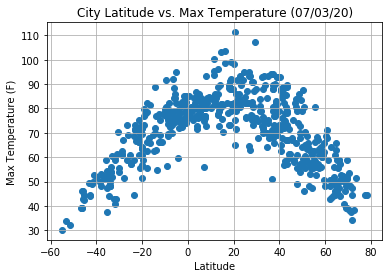

Temperature is inversely realted to Latitude, as latitude increases, the temperature falls


In [10]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker ='o')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x") ) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("output_data/tempinworld.png")
plt.show()
print(f'Temperature is inversely realted to Latitude, as latitude increases, the temperature falls')

#### Latitude vs. Humidity Plot

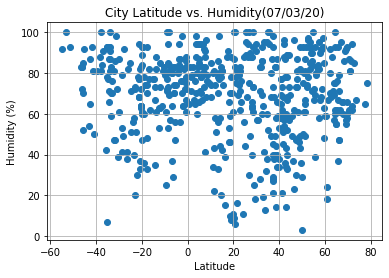

There is no relationship between temperature and humidity


In [11]:
plt.scatter(city_data['Lat'], city_data['Humidity'], marker ='o')
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("output_data/humidityinworld.png")
plt.show()
print(f'There is no relationship between temperature and humidity')

#### Latitude vs. Cloudiness Plot

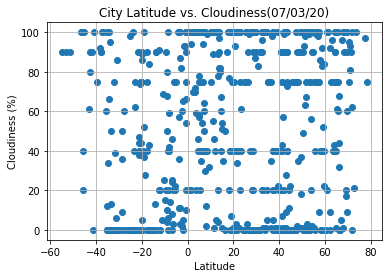

 Cloud coverage is more in higher altitude than in lower altitudes. Cloudiness is highest around 60s, and for latitude above 50N, the annual average cloud cover is about 70%.


In [12]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker ='o')
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("output_data/cloudinessinworld.png")
plt.show()
print(f' Cloud coverage is more in higher altitude than in lower altitudes. Cloudiness is highest \
around 60s, and for latitude above 50N, the annual average cloud cover is about 70%.')
# Reference: http://www-das.uwyo.edu/~geerts/cwx/notes/chap08/cloud_lat.html

#### Latitude vs. Wind Speed Plot

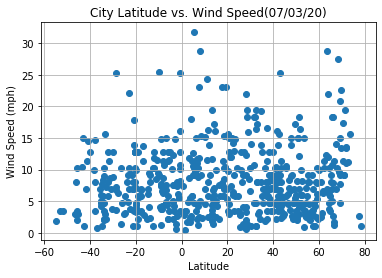

 There is no relationship between windspeed and latitude.


In [13]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker ='o')
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("output_data/windspeedinworld.png")
plt.show()
print(f' There is no relationship between windspeed and latitude.')

## Linear Regression

In [14]:
# Create a function to create Linear Regression plots
def plot_regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # with using the point, the lineregress will not appear for all the regressions,\
    # so I drew each of them separately.
    plt.annotate(line_eq,(0,10),fontsize=15,color="red")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue}")

In [15]:
# Create Northern and Southern Hemisphere DataFrames
city_df_nh = city_data.loc[city_data["Lat"] >= 0] #len(city_df_nh)=380
city_df_sh = city_data.loc[city_data["Lat"] < 0] #len(city_df_sh)=168

The r-squared is: -0.7309337275318452


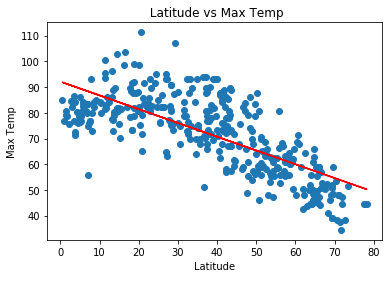

The r-squared is: -0.0025750211508047175


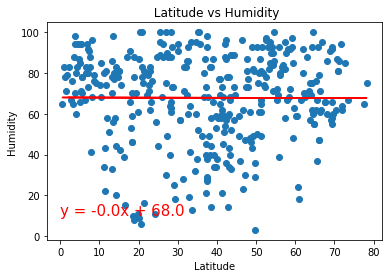

The r-squared is: -0.045317797683073695


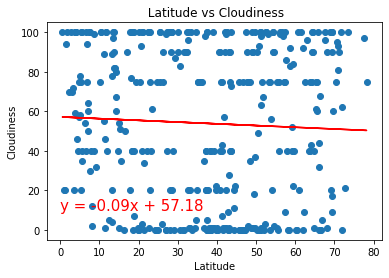

The r-squared is: -0.005198909116058779


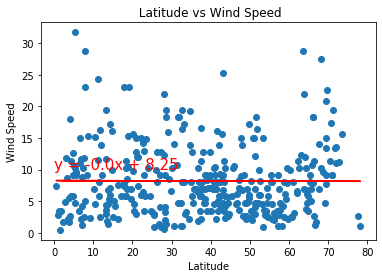

<Figure size 432x288 with 0 Axes>

In [16]:
#Northern Hemisphere Regression Lines
var_list = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
counter=0
for variables in var_list:
    x_values = city_df_nh["Lat"]
    y_values = city_df_nh[var_list[counter]] #0 is associated with "Max Temp",1 is associated with"Humidity" and so on!
    plt.title(f" Latitude vs %s" % var_list[counter])
    plot_regression (x_values, y_values)
    plt.xlabel('Latitude')
    plt.ylabel(var_list[counter])
    plt.show()
    plt.clf()
    counter= counter + 1
    if counter ==4:
        break

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7309337275318452


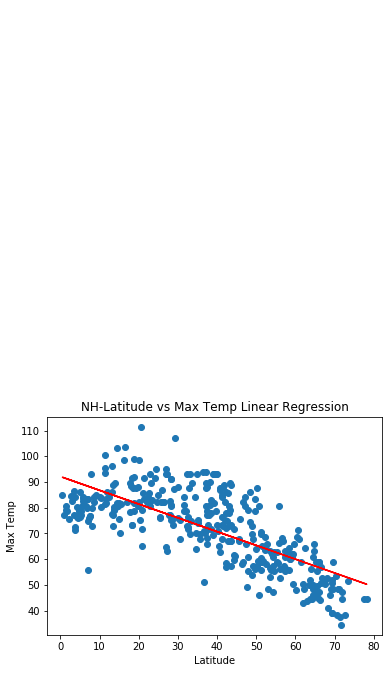

In [17]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("NH-Latitude vs Max Temp Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,270),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8659543077643171


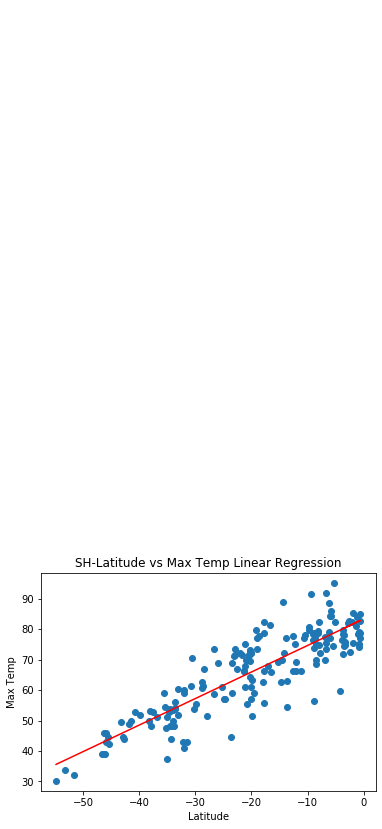

In [18]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("SH-Latitude vs Max Temp Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,280),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.0025750211508047175


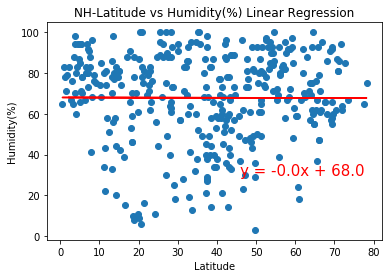

In [19]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("NH-Latitude vs Humidity(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05843900612749659


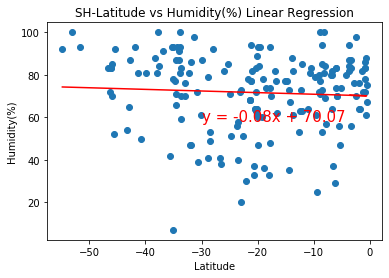

In [20]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("SH-Latitude vs Humidity(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,58),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.045317797683073695


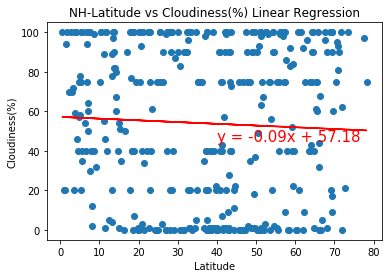

In [21]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("NH-Latitude vs Cloudiness(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.12687377264452124


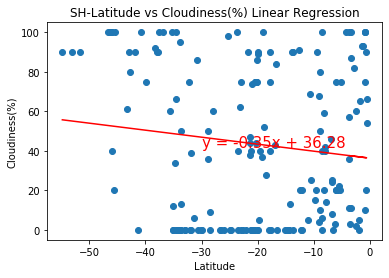

In [22]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("SH-Latitude vs Cloudiness(%) Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,42),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.005198909116058779^2


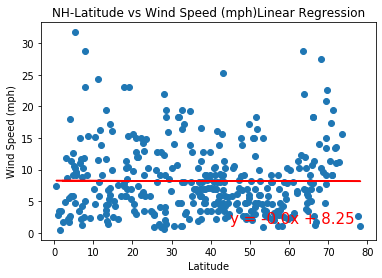

In [23]:
# Add the linear regression model
x_values = city_df_nh['Lat']
y_values = city_df_nh['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("NH-Latitude vs Wind Speed (mph)Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,1.5),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}^2")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12861162086828953


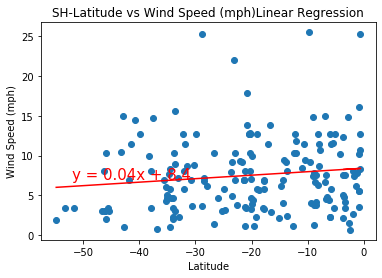

In [24]:
# Add the linear regression model
x_values = city_df_sh['Lat']
y_values = city_df_sh['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("SH-Latitude vs Wind Speed (mph)Linear Regression")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,7),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()